In [79]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [80]:
train = pd.read_csv(r"D:\Data Sets\TItanic\train.csv")
test = pd.read_csv(r"D:\Data Sets\TItanic\test.csv")
test_submission = pd.read_csv(r"D:\Data Sets\TItanic\gender_submission.csv")

test = pd.merge(test, test_submission, on='PassengerId')

data = pd.concat([train, test])
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [82]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


EDA (Exploratory Data Analysis)


In [83]:
cols = data.columns
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [84]:
#data.Survived = data.Survived.astype('object')
categorical = [col for col in data.columns if data[col].dtype == 'object']
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [85]:
numerical = [col for col in data.columns if data[col].dtype != 'object']
numerical

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

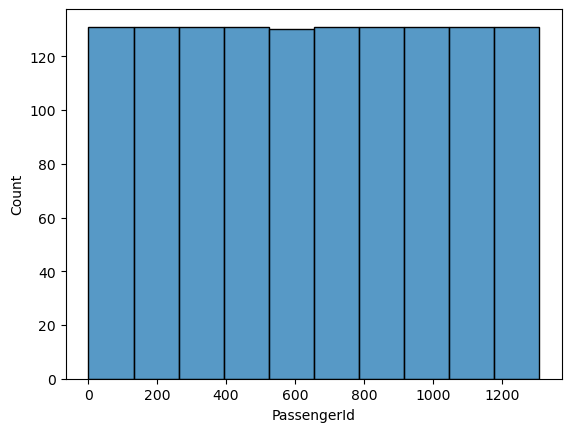

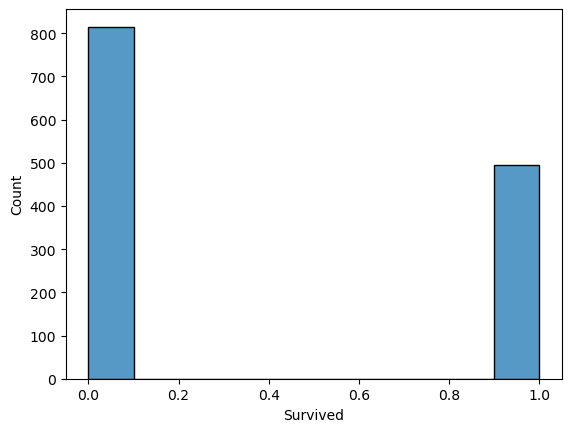

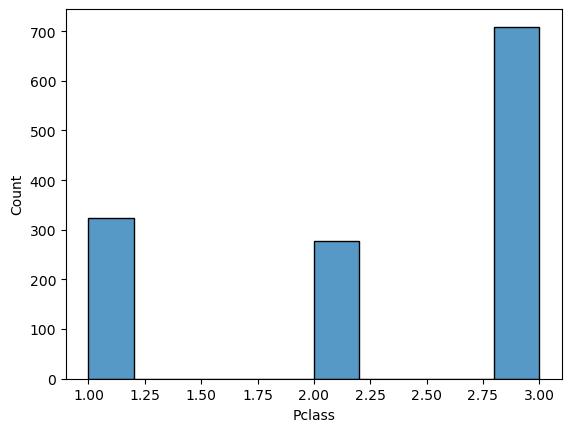

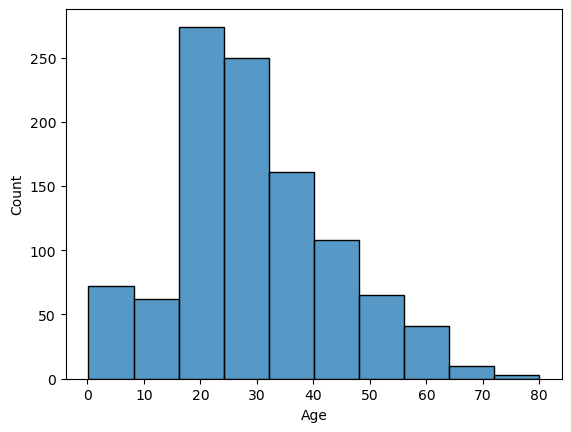

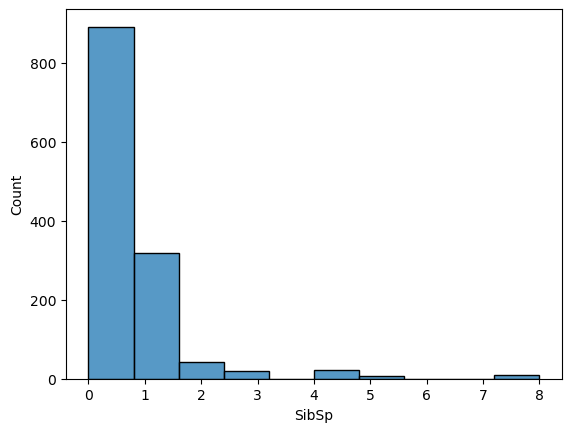

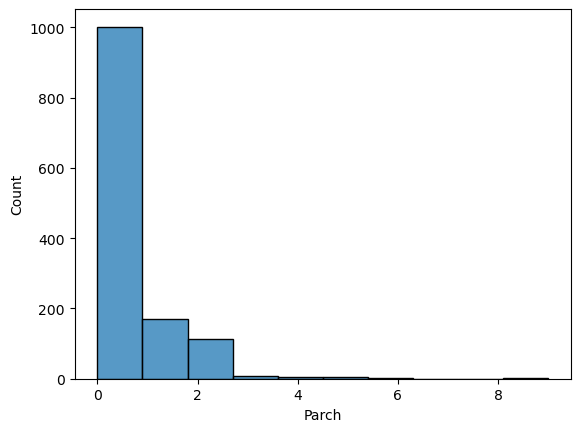

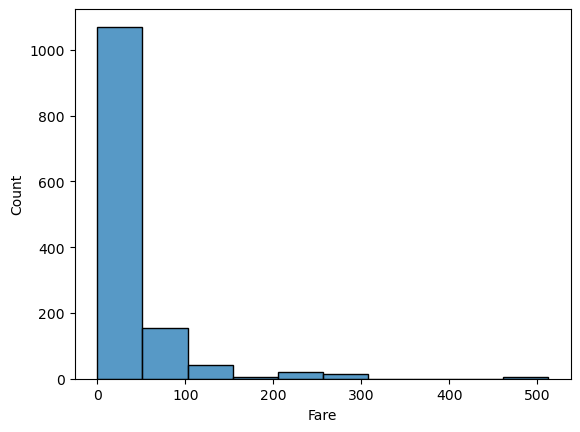

In [86]:
for i in numerical:
    sns.histplot(data[i], bins=10)
    plt.show()

In [87]:
numerical.remove('Survived')
numerical.remove('PassengerId')
pd.pivot_table(data, index="Survived", values=numerical, aggfunc='mean')

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.510986,23.879124,0.311656,2.467485,0.496933
1,28.931079,48.811497,0.506073,2.010121,0.502024


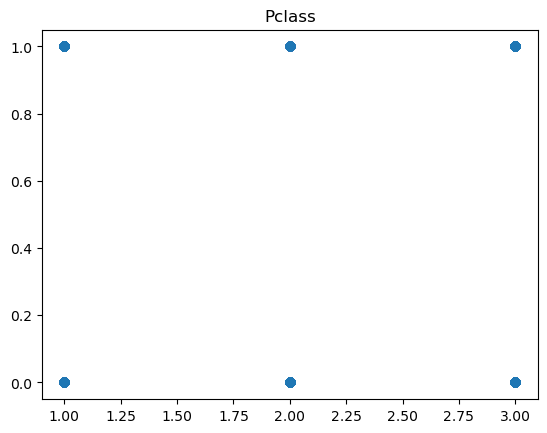

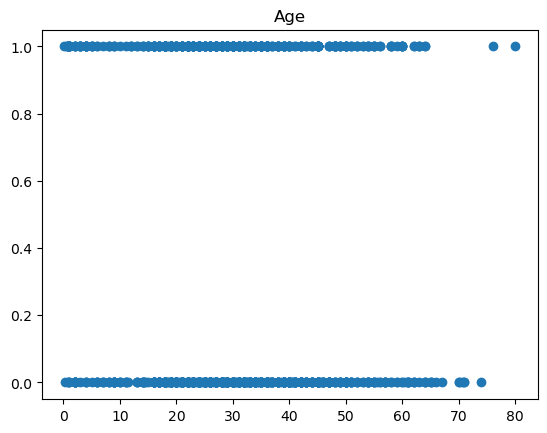

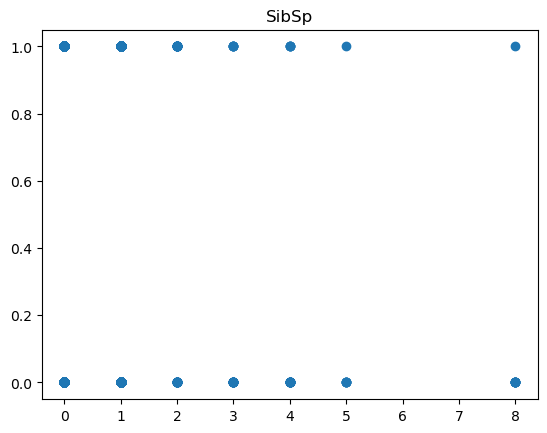

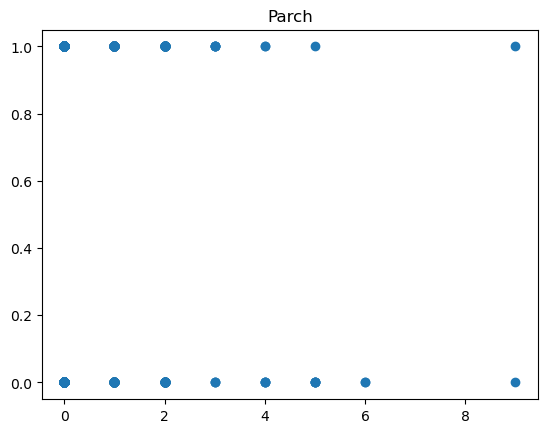

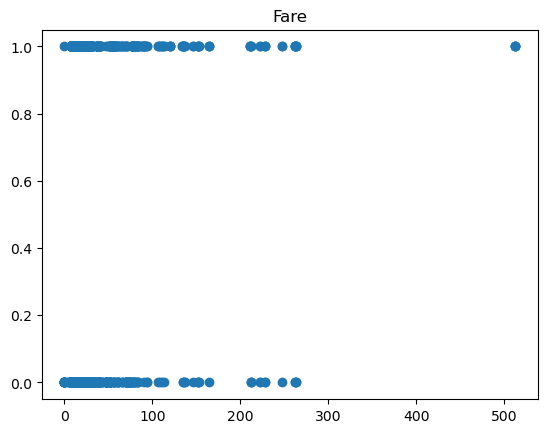

In [88]:
for i in numerical:
    plt.scatter(x=data[i], y=data['Survived'])
    plt.title(i)
    plt.show()

C:\Users\mass\AppData\Local\Temp\ipykernel_23616\193430817.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

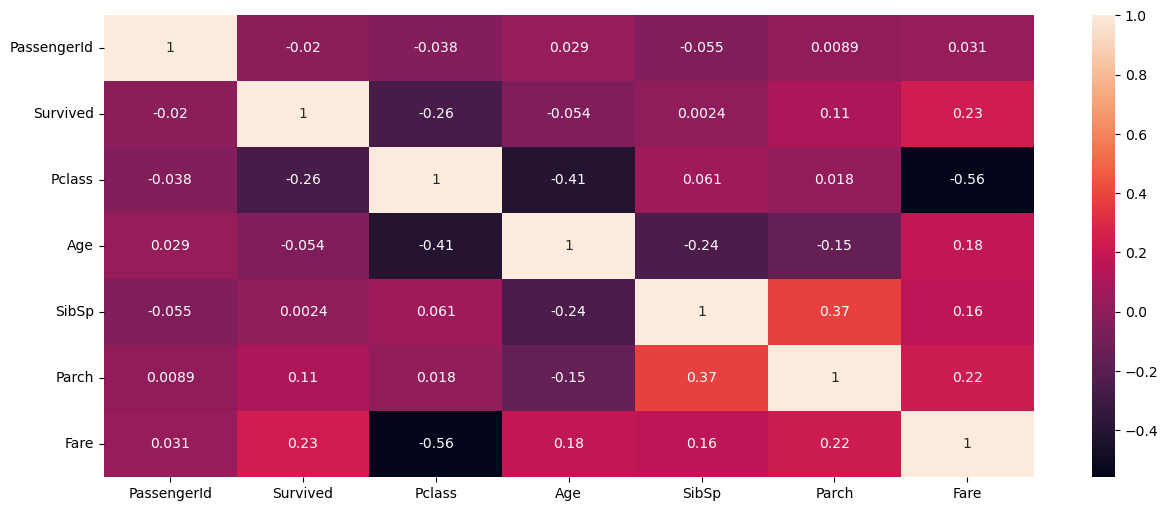

In [89]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(), annot=True)

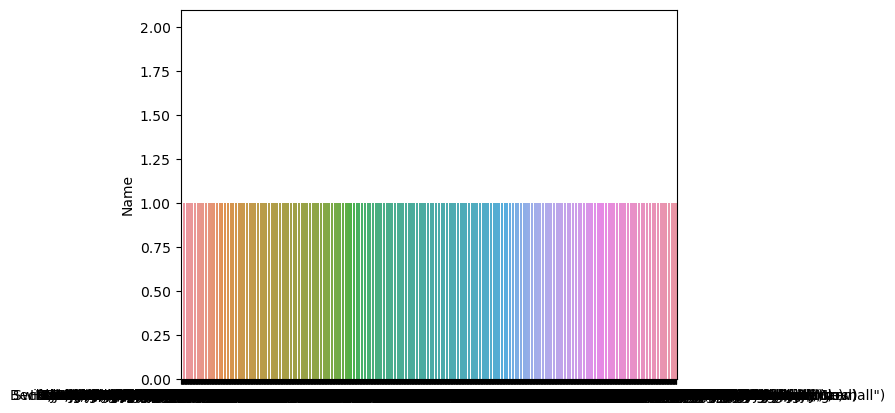

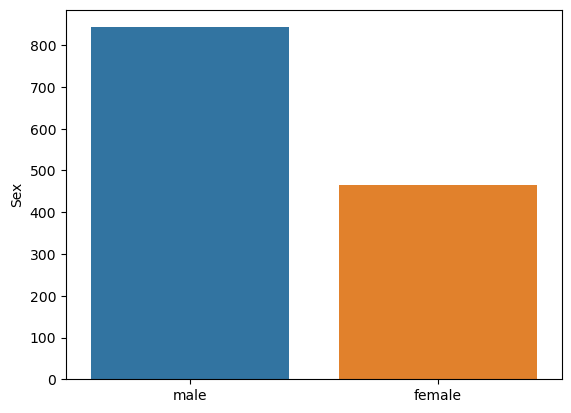

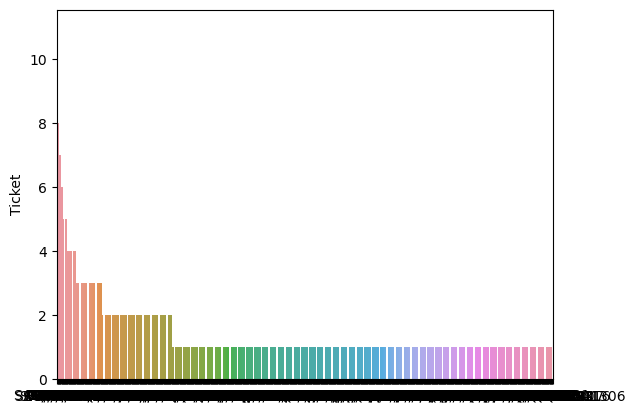

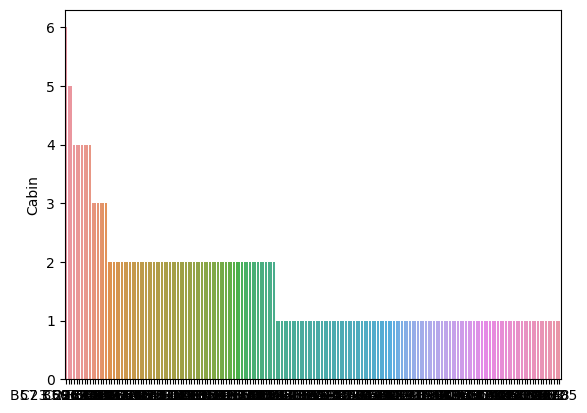

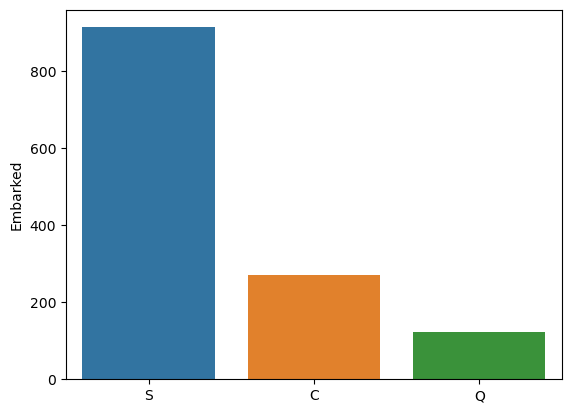

In [90]:
for i in categorical:
    sns.barplot(data, x = data[i].value_counts().index, y = data[i].value_counts())
    plt.show()
   

In [91]:
for i in categorical:
    display(data.groupby(i).Survived.agg(['mean']))


,mean
Name,
"Abbing, Mr. Anthony",0.0
"Abbott, Master. Eugene Joseph",0.0
"Abbott, Mr. Rossmore Edward",0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1.0
"Abelseth, Miss. Karen Marie",1.0
...,...
"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",1.0
"van Billiard, Master. James William",0.0
"van Billiard, Master. Walter John",0.0


,mean
Sex,
female,0.82618
male,0.12930


,mean
Ticket,
110152,1.000000
110413,0.666667
110465,0.000000
110469,0.000000
110489,0.000000
...,...
W./C. 6608,0.000000
W./C. 6609,0.000000
W.E.P. 5734,0.500000


,mean
Cabin,
A10,0.0
A11,1.0
A14,0.0
A16,1.0
A18,0.0
...,...
F33,1.0
F38,0.0
F4,1.0


,mean
Embarked,
C,0.492593
Q,0.439024
S,0.333698


Feature Engineering

In [92]:
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [93]:
name_title = data.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())
data['name_title'] = name_title
name_title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Name, dtype: int64

Is this have effect on surviving ratio?

In [94]:
data.groupby(name_title).Survived.agg('mean')

Name
Capt            0.000000
Col             0.250000
Don             0.000000
Dona            1.000000
Dr              0.375000
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.377049
Miss            0.788462
Mlle            1.000000
Mme             1.000000
Mr              0.107001
Mrs             0.868020
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64

In [95]:
data["multiple_cabin"] = data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(" ")))

In [96]:
gender = data.Sex

In [97]:
ticket = data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [98]:
data.groupby(ticket).Survived.agg(['mean']) # we ignore it

,mean
Ticket,
0,0.389205
1,0.373041


In [99]:
cab = data.Cabin.apply(lambda x:str(x)[0])
data['Cabin_type'] = cab
cab.value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [100]:
data.groupby(cab).Survived.agg(['mean'])

,mean
Cabin,
A,0.454545
B,0.676923
C,0.574468
D,0.652174
E,0.682927
F,0.523810
G,0.600000
T,0.000000
n,0.309665


In [101]:
embarked = data.Embarked


In [102]:
data.groupby(embarked).Survived.agg(['mean'])

,mean
Embarked,
C,0.492593
Q,0.439024
S,0.333698


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        1309 non-null   int64  
 2   Pclass          1309 non-null   int64  
 3   Name            1309 non-null   object 
 4   Sex             1309 non-null   object 
 5   Age             1046 non-null   float64
 6   SibSp           1309 non-null   int64  
 7   Parch           1309 non-null   int64  
 8   Ticket          1309 non-null   object 
 9   Fare            1308 non-null   float64
 10  Cabin           295 non-null    object 
 11  Embarked        1307 non-null   object 
 12  name_title      1309 non-null   object 
 13  multiple_cabin  1309 non-null   int64  
 14  Cabin_type      1309 non-null   object 
dtypes: float64(2), int64(6), object(7)
memory usage: 163.6+ KB


In [104]:
data.Age = data.Age.fillna(data.Age.mean())
data.dropna(subset=['Fare', 'Embarked'], inplace=True)
data.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        1306 non-null   int64  
 1   Pclass          1306 non-null   int64  
 2   Sex             1306 non-null   object 
 3   Age             1306 non-null   float64
 4   SibSp           1306 non-null   int64  
 5   Parch           1306 non-null   int64  
 6   Fare            1306 non-null   float64
 7   Embarked        1306 non-null   object 
 8   name_title      1306 non-null   object 
 9   multiple_cabin  1306 non-null   int64  
 10  Cabin_type      1306 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 122.4+ KB


In [106]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'name_title', 'Cabin_type'])


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 1306 non-null   int64  
 1   Pclass                   1306 non-null   int64  
 2   Age                      1306 non-null   float64
 3   SibSp                    1306 non-null   int64  
 4   Parch                    1306 non-null   int64  
 5   Fare                     1306 non-null   float64
 6   multiple_cabin           1306 non-null   int64  
 7   Sex_female               1306 non-null   uint8  
 8   Sex_male                 1306 non-null   uint8  
 9   Embarked_C               1306 non-null   uint8  
 10  Embarked_Q               1306 non-null   uint8  
 11  Embarked_S               1306 non-null   uint8  
 12  name_title_Capt          1306 non-null   uint8  
 13  name_title_Col           1306 non-null   uint8  
 14  name_title_Don           

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [109]:
x = data.drop(['Survived'], axis=1)
y = data['Survived']


scalar = StandardScaler()
x = scalar.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train.shape

(1044,)

In [110]:

x_train.shape

(1044, 38)

In [111]:
x_test.shape

(262, 38)

In [112]:
model = LogisticRegression()
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.867816091954023
0.8854961832061069


In [113]:
model = SVC()
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8716475095785441
0.8778625954198473


In [114]:
model = LinearSVC(dual=True)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8601532567049809
0.8816793893129771


c:\Users\mass\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
